<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_0_3_0_7_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.3_0.7'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.542793,53.333570,83.351238,0.359214,215.586815,215.321525,0.265290
1,0.0,1.0,74.567486,46.441789,29.436098,0.110238,160.555611,160.482213,0.073398
2,0.0,2.0,62.613577,77.383451,89.448904,-0.242027,239.203905,239.484785,-0.280880
3,0.0,3.0,38.824319,21.357612,26.691584,-0.616457,96.257058,97.158583,-0.901525
4,0.0,4.0,47.011889,63.560654,41.162665,0.033977,161.769186,161.844551,-0.075366
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,49.741492,26.901965,23.479184,0.300978,110.423618,109.940421,0.483197
119996,999.0,116.0,50.365120,79.600300,96.035975,-0.633779,235.367616,235.983619,-0.616003
119997,999.0,117.0,89.627175,92.136316,31.098389,0.175626,223.037507,222.739618,0.297889
119998,999.0,118.0,43.919718,81.382449,67.407206,0.204796,202.914169,202.678586,0.235583


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.542793  53.333570  83.351238  ...  215.586815  215.321525  0.265290
      1.0    74.567486  46.441789  29.436098  ...  160.555611  160.482213  0.073398
      2.0    62.613577  77.383451  89.448904  ...  239.203905  239.484785 -0.280880
      3.0    38.824319  21.357612  26.691584  ...   96.257058   97.158583 -0.901525
      4.0    47.011889  63.560654  41.162665  ...  161.769186  161.844551 -0.075366
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  49.741492  26.901965  23.479184  ...  110.423618  109.940421  0.483197
      116.0  50.365120  79.600300  96.035975  ...  235.367616  235.983619 -0.616003
      117.0  89.627175  92.136316  31.098389  ...  223.037507  222.739618  0.297889
      118.0  43.919718  81.382449  67.407206  ...  202.914169  202.678586  0.235583
      119.0  93.295659  63.110978  58.264138  ...  224.941620  224.514783  0.426837

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.542793  53.333570  83.351238  ...  215.586815  215.321525  0.265290
      1.0    74.567486  46.441789  29.436098  ...  160.555611  160.482213  0.073398
      2.0    62.613577  77.383451  89.448904  ...  239.203905  239.484785 -0.280880
      3.0    38.824319  21.357612  26.691584  ...   96.257058   97.158583 -0.901525
      4.0    47.011889  63.560654  41.162665  ...  161.769186  161.844551 -0.075366
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  49.741492  26.901965  23.479184  ...  110.423618  109.940421  0.483197
      116.0  50.365120  79.600300  96.035975  ...  235.367616  235.983619 -0.616003
      117.0  89.627175  92.136316  31.098389  ...  223.037507  222.739618  0.297889
      118.0  43.919718  81.382449  67.407206  ...  202.914169  202.678586  0.235583
      119.0  93.295659  63.110978  58.264138  ...  224.941620  224.514783  0.426837

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.542793,53.333570,83.351238,0.359214,215.586815,215.321525,0.265290
1,0.0,1.0,74.567486,46.441789,29.436098,0.110238,160.555611,160.482213,0.073398
2,0.0,2.0,62.613577,77.383451,89.448904,-0.242027,239.203905,239.484785,-0.280880
3,0.0,3.0,38.824319,21.357612,26.691584,-0.616457,96.257058,97.158583,-0.901525
4,0.0,4.0,47.011889,63.560654,41.162665,0.033977,161.769186,161.844551,-0.075366
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,49.741492,26.901965,23.479184,0.300978,110.423618,109.940421,0.483197
119996,999.0,116.0,50.365120,79.600300,96.035975,-0.633779,235.367616,235.983619,-0.616003
119997,999.0,117.0,89.627175,92.136316,31.098389,0.175626,223.037507,222.739618,0.297889
119998,999.0,118.0,43.919718,81.382449,67.407206,0.204796,202.914169,202.678586,0.235583


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.542793  53.333570  83.351238  ...  215.586815  215.321525  0.265290
      1.0    74.567486  46.441789  29.436098  ...  160.555611  160.482213  0.073398
      2.0    62.613577  77.383451  89.448904  ...  239.203905  239.484785 -0.280880
      3.0    38.824319  21.357612  26.691584  ...   96.257058   97.158583 -0.901525
      4.0    47.011889  63.560654  41.162665  ...  161.769186  161.844551 -0.075366
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  49.741492  26.901965  23.479184  ...  110.423618  109.940421  0.483197
      116.0  50.365120  79.600300  96.035975  ...  235.367616  235.983619 -0.616003
      117.0  89.627175  92.136316  31.098389  ...  223.037507  222.739618  0.297889
      118.0  43.919718  81.382449  67.407206  ...  202.914169  202.678586  0.235583
      119.0  93.295659  63.110978  58.264138  ...  224.941620  224.514783  0.426837

[120000 rows x 7 columns]

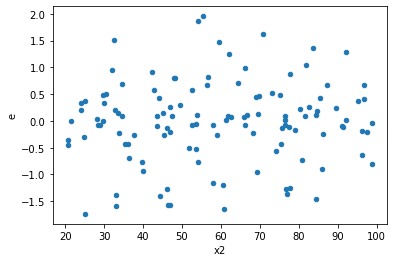

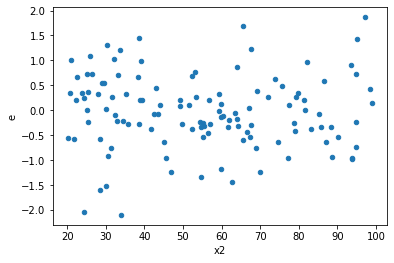

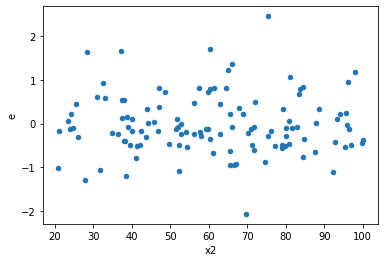

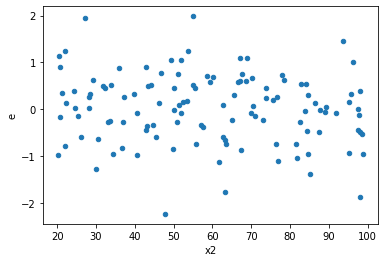

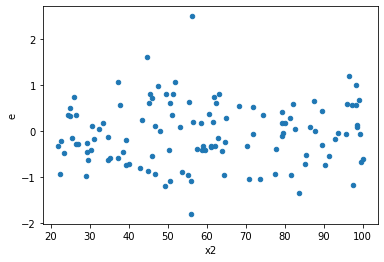

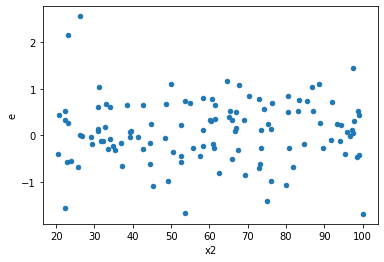

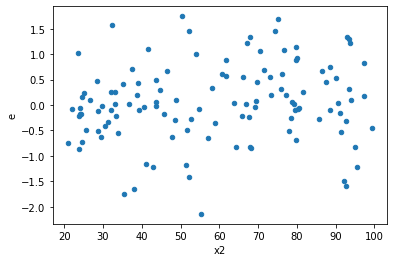

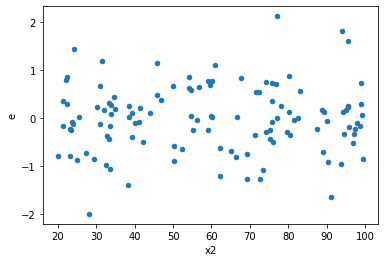

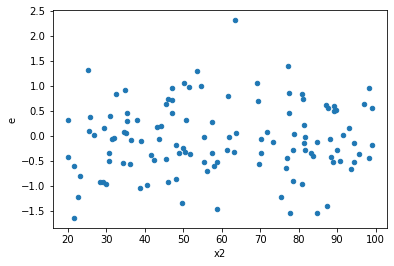

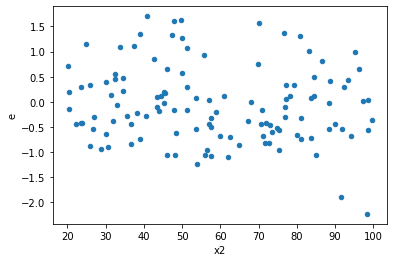

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,64.0,50.0,33.482937239740124,35.83375358795305,0.5231708943709394,0.716675071759061,1.3698680096124056,0.24887982565110423,0.8755600871744479,0.12443991282555211,Reject005=1 : Homoscedasticity
2.0,64.0,50.0,34.494277537120574,27.543354766978766,0.538973086517509,0.5508670953395753,1.0220679086202944,0.9438574872385512,0.5280712563807244,0.4719287436192756,Reject005=1 : Homoscedasticity
3.0,53.0,61.0,17.774562142090332,35.519282913329405,0.3353690970205723,0.582283326448023,1.7362462183338987,0.03798499495759078,0.9810075025212046,0.01899249747879539,Reject005=0 : Heteroscedasticity
4.0,52.0,62.0,23.666983317355367,31.838396595806124,0.4551342945645263,0.5135225257388084,1.1282879182509156,0.6452684159651856,0.6773657920174072,0.3226342079825928,Reject005=1 : Homoscedasticity
5.0,55.0,59.0,27.73313014153707,33.850805441411524,0.5042387298461286,0.5737424651086699,1.1378389464128444,0.6253153082067486,0.6873423458966257,0.3126576541033743,Reject005=1 : Homoscedasticity
7.0,59.0,55.0,21.460285311980645,25.698382913794372,0.36373364935560415,0.4672433257053522,1.2845754758547285,0.34982175766711565,0.8250891211664422,0.17491087883355783,Reject005=1 : Homoscedasticity
11.0,65.0,49.0,35.104166062032924,26.927669221246056,0.540064093262045,0.5495442698213481,1.0175537990352994,0.9583889099593303,0.5208055450203348,0.4791944549796652,Reject005=1 : Homoscedasticity
14.0,59.0,55.0,22.567510879372357,27.4329281171505,0.38250018439614164,0.49878051122091815,1.3040007078907685,0.321729723287588,0.839135138356206,0.160864861643794,Reject005=1 : Homoscedasticity
18.0,54.0,60.0,21.595327654085626,31.46066254738566,0.3999134750756597,0.524344375789761,1.3111445561832098,0.30665429781409803,0.846672851092951,0.15332714890704902,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,54.0,32.43324058258937,26.806604126321552,0.5405540097098228,0.4964185949318806,0.9183515171746951,0.7455347472600559,Reject005=1 : Homoscedasticity
1.0,64.0,50.0,33.482937239740124,35.83375358795305,0.5231708943709394,0.716675071759061,1.3698680096124056,0.24887982565110423,Reject005=1 : Homoscedasticity
2.0,64.0,50.0,34.494277537120574,27.543354766978766,0.538973086517509,0.5508670953395753,1.0220679086202944,0.9438574872385512,Reject005=1 : Homoscedasticity
3.0,53.0,61.0,17.774562142090332,35.519282913329405,0.3353690970205723,0.582283326448023,1.7362462183338987,0.03798499495759078,Reject005=0 : Heteroscedasticity
4.0,52.0,62.0,23.666983317355367,31.838396595806124,0.4551342945645263,0.5135225257388084,1.1282879182509156,0.6452684159651856,Reject005=1 : Homoscedasticity
5.0,55.0,59.0,27.73313014153707,33.850805441411524,0.5042387298461286,0.5737424651086699,1.1378389464128444,0.6253153082067486,Reject005=1 : Homoscedasticity
6.0,52.0,62.0,38.92674972986953,25.10785744141444,0.7485913409590293,0.4049654426034587,0.5409699798085462,0.024131276630159754,Reject005=0 : Heteroscedasticity
7.0,59.0,55.0,21.460285311980645,25.698382913794372,0.36373364935560415,0.4672433257053522,1.2845754758547285,0.34982175766711565,Reject005=1 : Homoscedasticity
8.0,45.0,69.0,29.200361384746934,23.466342158045165,0.648896919661043,0.3400919153339879,0.5241077666259194,0.022354686899659623,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      924
Reject005=0 : Heteroscedasticity     76
Name: Result_test, dtype: int64